# NeuralNet

-- Taotao Tan

## NeuralNets
Neural networks take a set of inputs and create a function for each to help predict the output. The functions are randomly initialized and then progressively improved to best fit the data.

We will use the <code>keras</code> package to do this.

The code is adapted from [this post](https://www.pluralsight.com/guides/deep-learning-model-perform-binary-classification) and [this post](https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/)

### Load dataset, do train-test-split

In [1]:
# please install keras and tensorflow
# !pip install keras
# !pip install tensorflow

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

In [3]:
data = pd.read_csv("all.15k.patients.txt",sep = "\t")
data.head()

,dateofbirth,maritalstatus,race,ageatdiagnosis,alivestatus,survivaltime,grade,nodesexam,nodespos,extent,nodalstatus,size,pgr,er
pid00001,28/01/1932,5,2,61,0,110,3,32,3,10,6,60,2,2
pid00002,07/05/1934,2,3,60,0,100,2,13,1,10,6,15,1,1
pid00003,14/04/1921,5,3,76,0,70,3,8,0,10,0,8,1,1
pid00004,08/11/1931,3,3,61,1,31,3,20,0,10,0,10,2,2
pid00005,08/01/1922,2,3,74,1,47,2,16,8,10,6,15,2,1


In [4]:
X = np.array(data[["grade","nodespos","nodesexam","size","pgr","er"]])
y = np.array(data["alivestatus"])

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3333, random_state=42)

### Construct the model

In [5]:
# build the bodel
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(6,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [6]:
# fit the model and collect the history
History = model.fit(X_train, y_train, validation_split=0.33, epochs=150, batch_size=10, verbose=1)

Epoch 1/150
670/670 [==============================] - 1s 2ms/step - loss: 0.7880 - accuracy: 0.7553 - val_loss: 0.5378 - val_accuracy: 0.7952
Epoch 2/150
670/670 [==============================] - 1s 778us/step - loss: 0.4597 - accuracy: 0.8207 - val_loss: 0.4238 - val_accuracy: 0.8316
Epoch 3/150
670/670 [==============================] - 1s 815us/step - loss: 0.4191 - accuracy: 0.8325 - val_loss: 0.4111 - val_accuracy: 0.8297
Epoch 4/150
670/670 [==============================] - 1s 813us/step - loss: 0.4225 - accuracy: 0.8290 - val_loss: 0.4434 - val_accuracy: 0.8207
Epoch 5/150
670/670 [==============================] - 1s 787us/step - loss: 0.4245 - accuracy: 0.8253 - val_loss: 0.4185 - val_accuracy: 0.8231
Epoch 6/150
670/670 [==============================] - 1s 784us/step - loss: 0.4242 - accuracy: 0.8246 - val_loss: 0.3998 - val_accuracy: 0.8346
Epoch 7/150
670/670 [==============================] - 1s 855us/step - loss: 0.4115 - accuracy: 0.8350 - val_loss: 0.4066 - val_accu

670/670 [==============================] - 1s 778us/step - loss: 0.3884 - accuracy: 0.8368 - val_loss: 0.3933 - val_accuracy: 0.8285
Epoch 58/150
670/670 [==============================] - 1s 765us/step - loss: 0.3873 - accuracy: 0.8328 - val_loss: 0.3919 - val_accuracy: 0.8376
Epoch 59/150
670/670 [==============================] - 1s 779us/step - loss: 0.3887 - accuracy: 0.8435 - val_loss: 0.3894 - val_accuracy: 0.8358
Epoch 60/150
670/670 [==============================] - 1s 767us/step - loss: 0.3951 - accuracy: 0.8317 - val_loss: 0.3926 - val_accuracy: 0.8379
Epoch 61/150
670/670 [==============================] - 1s 770us/step - loss: 0.3911 - accuracy: 0.8343 - val_loss: 0.3839 - val_accuracy: 0.8376
Epoch 62/150
670/670 [==============================] - 1s 771us/step - loss: 0.3845 - accuracy: 0.8358 - val_loss: 0.3868 - val_accuracy: 0.8382
Epoch 63/150
670/670 [==============================] - 1s 768us/step - loss: 0.3795 - accuracy: 0.8378 - val_loss: 0.3961 - val_accuracy

670/670 [==============================] - 1s 771us/step - loss: 0.3880 - accuracy: 0.8372 - val_loss: 0.3881 - val_accuracy: 0.8367
Epoch 114/150
670/670 [==============================] - 1s 769us/step - loss: 0.3725 - accuracy: 0.8423 - val_loss: 0.3890 - val_accuracy: 0.8376
Epoch 115/150
670/670 [==============================] - 1s 772us/step - loss: 0.3903 - accuracy: 0.8368 - val_loss: 0.3910 - val_accuracy: 0.8349
Epoch 116/150
670/670 [==============================] - 1s 770us/step - loss: 0.3742 - accuracy: 0.8443 - val_loss: 0.3864 - val_accuracy: 0.8388
Epoch 117/150
670/670 [==============================] - 1s 764us/step - loss: 0.3773 - accuracy: 0.8423 - val_loss: 0.3897 - val_accuracy: 0.8400
Epoch 118/150
670/670 [==============================] - 1s 766us/step - loss: 0.3852 - accuracy: 0.8431 - val_loss: 0.3907 - val_accuracy: 0.8413
Epoch 119/150
670/670 [==============================] - 1s 773us/step - loss: 0.3786 - accuracy: 0.8388 - val_loss: 0.3901 - val_ac

In [7]:
# evaluate the model using the test set
test_loss, test_acc = model.evaluate(X_test, y_test)

# accuracy of the test set
print('Test accuracy:', test_acc)

157/157 [==============================] - 0s 463us/step - loss: 0.3953 - accuracy: 0.8336
Test accuracy: 0.8335999846458435


### Let's predict the test set

In [8]:
# predict the probability instead of labels
model.predict(X_test)

array([[0.17449018],
       [0.04239953],
       [0.03796303],
       ...,
       [0.19688073],
       [0.07835883],
       [0.08079761]], dtype=float32)

### View the model fitting history

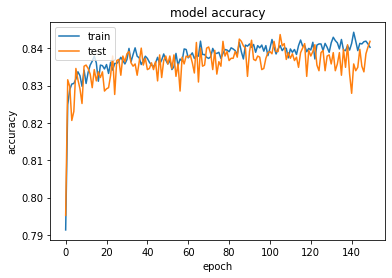

In [11]:
# the fitting history, accuracy increases

plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

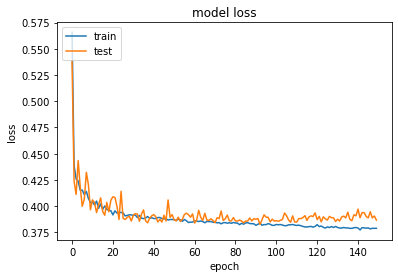

In [12]:
# the fitting history, loss function decreases

plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()